In [1]:
import pandas as pd
import dhlab as dh
import dhlab.ngram as ng
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
def word2ddc(word=None, limit=30000):
    small_set = dh.Corpus(doctype = "digibok", fulltext=word, limit = limit, from_year = 1920, to_year=2022)
    print("korpusstørrelse", small_set.size)
    small_ddc = Counter([x for y in small_set.corpus.ddc.values for x in list(set([z.strip() for z in y.split('/')]))])
    ddk_small = pd.DataFrame.from_dict(small_ddc, orient='index', columns=["frekvens"]).sort_values(by = 'frekvens', ascending=False)
    return ddk_small

def word2subjects(word=None, limit=30000):
    small_set = dh.Corpus(doctype = "digibok", fulltext=word, limit = limit, from_year = 1920, to_year=2022)
    print("korpusstørrelse", small_set.size)
    small_ddc = Counter([x.strip() for y in small_set.corpus.subjects.values for x in set(y.split('/'))])
    ddk_small = pd.DataFrame.from_dict(small_ddc, orient='index', columns=["frekvens"]).sort_values(by = 'frekvens', ascending=False)
    return ddk_small


In [25]:
def show_ddc(word):
    return (
        word2ddc(word)
        .groupby(lambda x: x[:3])
        .sum()
        .sort_values(by='frekvens', ascending=False)
    )

In [26]:
def show_subjects(word):
    return (
        word2subjects(word)
        .groupby(lambda x: x[:3])
        .sum()
        .sort_values(by='frekvens', ascending=False)
    )

In [29]:
brystasse_ddc = show_ddc('brystkasse')

korpusstørrelse 16392


In [30]:
toraks_ddc = show_ddc('toraks')

korpusstørrelse 712


In [31]:
thorax_ddc = show_ddc('thorax')

korpusstørrelse 3720


In [35]:
combo = pd.concat([thorax_ddc, toraks_ddc], axis = 1)

In [36]:
combo.columns = ['Thorax', 'Toraks']

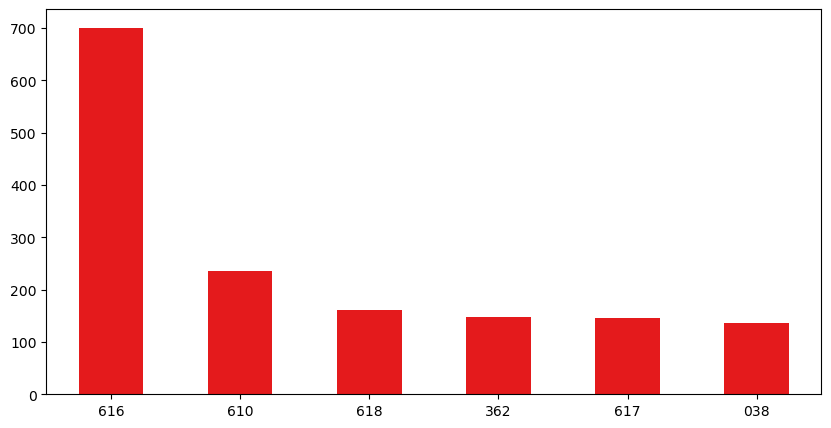

In [32]:
ax = thorax_ddc[thorax_ddc.index != ''].head(6).plot.bar(figsize=(10,5), legend=False, rot=0, cmap="Set1")

plt.savefig("ddk_thorax.jpg", dpi=300)

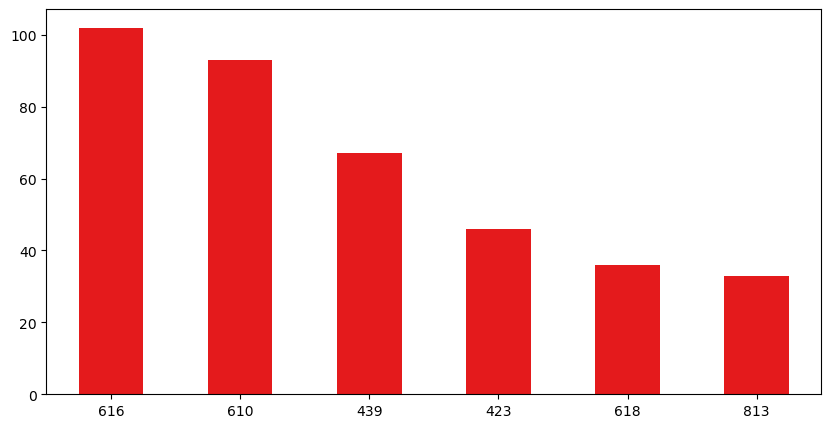

In [33]:
ax = toraks_ddc[toraks_ddc.index != ''].head(6).plot.bar(figsize=(10,5), legend=False, rot=0, cmap="Set1")

plt.savefig("ddk_thorax.jpg", dpi=300)

In [41]:
combo_sort = combo.sort_values(by="Toraks", ascending=False)

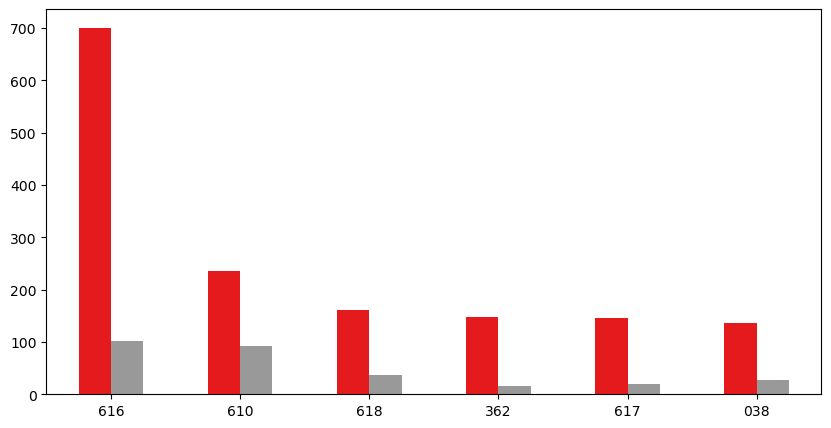

In [37]:
ax = combo[combo.index != ''].head(6).plot.bar(figsize=(10,5), legend=False, rot=0, cmap="Set1")

plt.savefig("ddk_thorax.jpg", dpi=300)

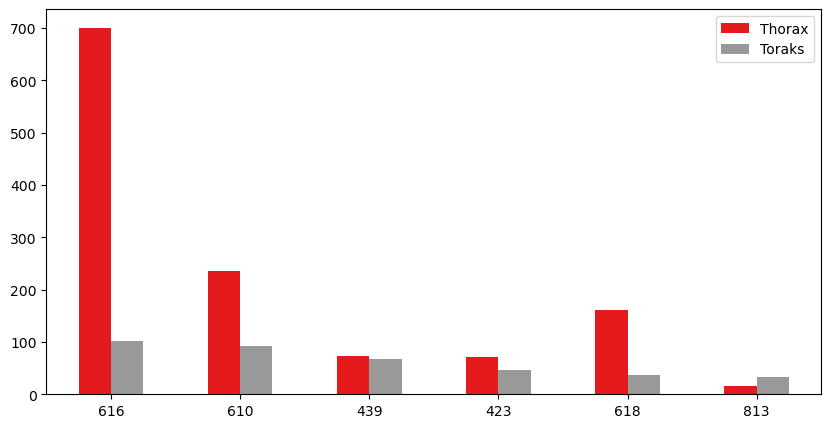

In [44]:
ax = combo_sort[combo_sort.index != ''].head(6).plot.bar(figsize=(10,5), legend=True, rot=0, cmap="Set1")
plt.savefig("ddk_thorax_toraks.jpg", dpi=300)

In [186]:
small_subjects = Counter([x.strip() for y in small_set.corpus.subjects.values for x in y.split('/')])
subjects_small = pd.DataFrame.from_dict(small_subjects, orient='index', columns=["frekvens"]).sort_values(by = 'frekvens', ascending=False)

In [188]:
subjects_small.head(20)

,frekvens
Norsk språk,92
ordbøker,74
språk,48
norsk,41
Bokmål,35
medisin,33
Medisin,31
Engelsk språk,29
Dictionary,27
"Dictionaries, Medical",25


In [264]:
medical_books = dh.Corpus(doctype='digibok', from_year = 1950, to_year = 2022, ddk = "61*", limit = 30000)

In [265]:
medical_books.size

12705

In [231]:
canthus_books = dh.Corpus(doctype = "digibok", fulltext='canthus', limit = 1000, from_year = 1920, to_year=2022)

In [261]:
canthus_books.corpus.ddc.values

array(['610.3 / 610.3 / 610.3 / 610.3', '610.3 / 610.3', '581.092', '',
       '', '616.9802', '', '616.003', '616.02 / 616.0252', '616.003', '',
       '616.072', '153.7', '', '439.812403', '439.823', '038.81',
       '439.823 / 439.63 / 439.823 / 439.823', '610.3', '617.6', '',
       '121', '610.3 / 610.3 / 610.3', '439.823 / 439.823', '', '473',
       '610.3 / 610.3', '610.3', '473 / 473.3983', '612.8', '612.8',
       '038.82', '', '610.3', '', '439.823 / 439.823', '',
       '610.3 / 610.3 / 610.3 / 150', '', '616.021 / 616.0012', '',
       '614.7', '439.823 / 439.823', '439.823 / 439.823',
       '610.3 / 610.3 / 610.3', '', '617.7', '', '443', '038.82', '617.7',
       '439.823', '', '636.1089796', '', '878 / 878.04', '616.857',
       '439.823 / 439.823', '616.6', '611.8', '613.5', '616.072',
       '616.98', '473 / 473', '616.8', '616.84', '439.82203 / 439.822',
       '439.823 / 439.823', '', '', '443', '616.994', '620.8', '',
       '616.021', '', '423', '439.823', '', '6

In [262]:
[x for y in canthus_books.corpus.ddc.values for x in [z.strip() for z in y.split('/')]]

['610.3',
 '610.3',
 '610.3',
 '610.3',
 '610.3',
 '610.3',
 '581.092',
 '',
 '',
 '616.9802',
 '',
 '616.003',
 '616.02',
 '616.0252',
 '616.003',
 '',
 '616.072',
 '153.7',
 '',
 '439.812403',
 '439.823',
 '038.81',
 '439.823',
 '439.63',
 '439.823',
 '439.823',
 '610.3',
 '617.6',
 '',
 '121',
 '610.3',
 '610.3',
 '610.3',
 '439.823',
 '439.823',
 '',
 '473',
 '610.3',
 '610.3',
 '610.3',
 '473',
 '473.3983',
 '612.8',
 '612.8',
 '038.82',
 '',
 '610.3',
 '',
 '439.823',
 '439.823',
 '',
 '610.3',
 '610.3',
 '610.3',
 '150',
 '',
 '616.021',
 '616.0012',
 '',
 '614.7',
 '439.823',
 '439.823',
 '439.823',
 '439.823',
 '610.3',
 '610.3',
 '610.3',
 '',
 '617.7',
 '',
 '443',
 '038.82',
 '617.7',
 '439.823',
 '',
 '636.1089796',
 '',
 '878',
 '878.04',
 '616.857',
 '439.823',
 '439.823',
 '616.6',
 '611.8',
 '613.5',
 '616.072',
 '616.98',
 '473',
 '473',
 '616.8',
 '616.84',
 '439.82203',
 '439.822',
 '439.823',
 '439.823',
 '',
 '',
 '443',
 '616.994',
 '620.8',
 '',
 '616.021',
 '',

In [260]:
[x for y in canthus_books.corpus.ddc.values for x in list(set([z.strip() for z in y.split('/')]))]

['610.3',
 '610.3',
 '581.092',
 '',
 '',
 '616.9802',
 '',
 '616.003',
 '616.02',
 '616.0252',
 '616.003',
 '',
 '616.072',
 '153.7',
 '',
 '439.812403',
 '439.823',
 '038.81',
 '439.823',
 '439.63',
 '610.3',
 '617.6',
 '',
 '121',
 '610.3',
 '439.823',
 '',
 '473',
 '610.3',
 '610.3',
 '473.3983',
 '473',
 '612.8',
 '612.8',
 '038.82',
 '',
 '610.3',
 '',
 '439.823',
 '',
 '610.3',
 '150',
 '',
 '616.0012',
 '616.021',
 '',
 '614.7',
 '439.823',
 '439.823',
 '610.3',
 '',
 '617.7',
 '',
 '443',
 '038.82',
 '617.7',
 '439.823',
 '',
 '636.1089796',
 '',
 '878',
 '878.04',
 '616.857',
 '439.823',
 '616.6',
 '611.8',
 '613.5',
 '616.072',
 '616.98',
 '473',
 '616.8',
 '616.84',
 '439.82203',
 '439.822',
 '439.823',
 '',
 '',
 '443',
 '616.994',
 '620.8',
 '',
 '616.021',
 '',
 '423',
 '439.823',
 '',
 '610.3',
 '',
 '423.3982',
 '423',
 '',
 '610.3',
 '610.3',
 '423.3982',
 '423',
 '423.3982',
 '423',
 '617.7',
 '',
 '',
 '',
 '617.7',
 '',
 '',
 '610.3',
 '',
 '439.62',
 '616.857',
 '

In [244]:
canthus_books.corpus.sample(15)["urn title authors year ddc subjects".split()]

,urn,title,authors,year,ddc,subjects
58,URN:NBN:no-nb_digibok_2016080908169,Acupuncture in the prevention of recurrent unc...,"Alræk , Terje",2004,616.6,Urinary Tract Infections / Acupuncture
22,URN:NBN:no-nb_digibok_2012091906028,Store medisinske leksikon. 3 : I-M,,2007,610.3 / 610.3 / 610.3,Medicine / Encyclopedias / Medisin / leksika
176,URN:NBN:no-nb_digibok_2018060148074,Latinsk ordbok : latin-norsk,"Roggen , Vibeke / Kraggerud , Egil / Tosterud ...",2015,473.3982 / 473 / 473.3982 / 473.3982 / 473.398...,Latinsk språk / Norsk språk / latin / norsk / ...
77,URN:NBN:no-nb_digibok_2008081504085,Norsk ordbok med 1000 illustrasjoner : riksmål...,"Guttu , Tor / Langdalen , Anne / Minker , Thom...",1998,439.823,Norsk språk / Bokmål / Dictyocaulus Infections...
158,URN:NBN:no-nb_digibok_2010071308131,Appropriate building materials for low cost ho...,,1983,,Building materials / Congresses / Dwellings / ...
117,URN:NBN:no-nb_digibok_2015041608071,Arabic and Latin anatomical terminology : chie...,"Fonahn , Adolf",1922,,Latin language / Dictionaries Arabic / Human a...
168,URN:NBN:no-nb_digibok_2008011004089,Nynorskordboka : definisjons- og rettskrivings...,"Hovdenak , Marit",1993,439.823 / 439.823,Norway / Dictionary / Languages / Nynorsk språ...
164,URN:NBN:no-nb_digibok_2008062304088,Medisinsk ordbok,"Kåss , Erik / Hauge , Anton / Welle-Strand , G...",1992,610.3,Bokmål / Norsk språk / Medisin / Terminologi /...
127,URN:NBN:no-nb_digibok_2007072401049,Ordbog over det gamle norske Sprog. 4. b : Ret...,"Fritzner , Johan / Hødnebø , Finn",1972,439.5,Norrønt språk / ordbøker / norrøne / norrønt
76,URN:NBN:no-nb_digibok_2016060948069,Norsk engelsk ordbok : med oppslagsord på bokm...,"Haugen , Einar",1976,423,Bokmål / Dictionary / Norsk språk / Engelsk sp...


In [115]:
medical_periodicals = dh.Corpus(doctype='digitidsskrift', ddk = "61*", limit = 30000)

In [133]:
medical_books.corpus.sample(10)["urn title authors subjects ddc".split()]

,urn,title,authors,subjects,ddc
1101,URN:NBN:no-nb_digibok_2013052906040,Gymnos : lærebok : kroppsøving for den vidareg...,"Gjerset , Asbjørn / Nelvik , Nikolai",kroppsøving / videregående / skole / lærebøker...,613.7 / 796.076
5007,URN:NBN:no-nb_digibok_2014102408036,En friskere verden : historien om Verdens hels...,"Horn , Torbjørn",verdens / helseorganisasjon,614
10081,URN:NBN:no-nb_digibok_2011101408055,Apoteket i det medisinske liv i en norsk småby...,"Hopstock , Carsten",History of Medicine / Apoteker / Apotek / Farm...,615
5587,URN:NBN:no-nb_digibok_2013101406071,Rehabiliteringsomsorg for kreftpasienter : mot...,"Bøhn , Mona",Occupational Therapy / Neoplasms / rehabilitat...,362.196994 / 616.994
9165,URN:NBN:no-nb_digibok_2007111900063,Tannpleie for funksjonshemmede og kronisk syke,"Storhaug , Kari",Dental Care for Disabled / Dental Care for Chr...,617.6 / 617.601
2031,URN:NBN:no-nb_digibok_2011092608180,Livsgnisten : pacemakerbehandling ved Ullevål ...,"Grendahl , Helge / Platou , Eivind S.","Pacemaker, Artificial / Norway / History of Me...",617.41
12506,URN:NBN:no-nb_digibok_2009010500044,Modulation of Cardiac Ca2+ antagonist binding ...,"Stokke , Mimi",Calcium Channel Blockers / Ischemia / hjertesy...,616.1
5092,URN:NBN:no-nb_digibok_2016111108073,SEX - ja takk!,"Isachsen , Gro / Groven , Rolf",Sex Manuals / Sexuality / Sex / Sex Education ...,613.96
12077,URN:NBN:no-nb_digibok_2011011708067,Den første norske epidemiologi-konferansen,,Epidemiology,614.4
7592,URN:NBN:no-nb_digibok_2007081700020,"Propedeutisk pediatri : vekst, utvikling, ernæ...","Salomonsen , Leif / Seip , Martin",Pediatrics / Child Development / Growth / pedi...,618.92


In [189]:
counts = Counter([y.strip() for x in medical_books.corpus.subjects.values for y in x.split('/')])

In [190]:
len(counts.most_common())

20980

In [191]:
subjects_books = pd.DataFrame.from_dict(counts, orient='index', columns=["frekvens"]).sort_values(by = 'frekvens', ascending=False)

In [193]:
subjects_books.head(20)

,frekvens
,1860
medisin,913
barn,807
helse,783
behandling,769
psykiatri,745
sykepleie,642
sykdommer,590
Norway,572
Popular Works,543


In [10]:
c.corpus

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,100265526,URN:NBN:no-nb_digibok_2015072908254,Den tredje norske epidemiologi-konferansen,,oai:nb.bibsys.no:999519667824702202,bf04d046460243cf33e68ab4073f62d0,,[Oslo],19930101,1993,Foreningen,mul / eng / nob,Epidemiology,614.4,conference publication,Faglitteratur,digibok
1,100331951,URN:NBN:no-nb_digibok_2017042748068,Descriptive statistics on a nine-year surgico-...,"Wetteland , Per",oai:nb.bibsys.no:999611188144702202,df54c9ca3899eaa810053bd11a3a6788,,Trondheim,19700101,1970,Distributed by the Almqvist & Wiksell Periodic...,eng,,616.99,,Faglitteratur,digibok
2,100163393,URN:NBN:no-nb_digibok_2013081206049,Insights into siRNA-sensing by the immune syst...,"Flatekval , Gro Furset",oai:nb.bibsys.no:990940547204702202,65ae51859905c04a6dffd9c40f015e70,,[Oslo],20090101,2009,"Faculty of Medicine, University of Oslo",eng,"RNA, Small Interfering / genetics / Indoleamin...",616.079,,Faglitteratur,digibok
3,100141203,URN:NBN:no-nb_digibok_2013030806004,Cerebral infarction in young adults in Western...,"Næss , Halvor",oai:nb.bibsys.no:990500590334702202,8d9c19ca5af4d29c9fabefa52987a8e3,8277881819,Bergen,20040101,2004,"Nevrologisk institutt, University of Bergen",eng,Norway / Adult / Cerebral Infarction,616.81,,Faglitteratur,digibok
4,100368007,URN:NBN:no-nb_digibok_2018031948101,Spør på apoteket! : farmasøytisk rådgivning ve...,"Bakken , Kjersti / Pedersen , Ellen Birgitte /...",oai:nb.bibsys.no:991502888324702202,0fd18e1c3012fc4d9e4d422d0cf52016,,Bergen,20150101,2015,Fagbokforl.,nob,Pharmacology / Community Pharmacy Services / A...,615.1 / 615.1 / 615.1 / 615.58 / 615.58,,Faglitteratur,digibok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12740,100567788,URN:NBN:no-nb_digibok_2008020804009,Distal radius fracture : a study of occurrence...,"Hove , Leiv M.",oai:nb.bibsys.no:999506134604702202,7bb535a49d57592e47ccaa4b28ea2fae,8290977107,Bergen,19940101,1994,"Bergen Accident and Emergency Department, Berg...",mul / eng / nob,Radius Fractures / surgery / Radius Fractures ...,617.1,,Faglitteratur,digibok
12741,100455800,URN:NBN:no-nb_digibok_2009020600057,Norges Apothekere i 300 Aar : (1588-1889),"Flood , Jørgen W.",oai:nb.bibsys.no:999401152044702202,d663a36ae4df7c11bb10da0665010921,,,18890101,1889,Den norske Apothekerforening,nob,Pharmacies / Pharmacists / Norway / Farmasihis...,615.109481,,Uklassifisert,digibok
12742,100581434,URN:NBN:no-nb_digibok_2021110548118,Har den teoretisk svake sykepleiestudenten mul...,"Malones, Bente Dale",oai:nb.bibsys.no:999919980983202202,c5a790dbc77e53b6973edfc3b95ff10d,,Molde,2019,2019,Høgskolen i Molde - vitenskapelig høgskole i l...,nob,,610.730711,tekst,Faglitteratur,digibok
12743,100017888,URN:NBN:no-nb_digibok_2009030300113,Sauna,"Saijonmaa , Arja / Malmström , Gunnel",oai:nb.bibsys.no:999724768574702202,f7e34eb8a195089c313bdd992eda6828,8203260624,,19970101,1997,Aschehoug,nob / swe,Badstuer / Bading / badstu / finland,613.4,,Faglitteratur,digibok


In [275]:
conc = dh.Concordance(corpus = medical_books, query='kantus', limit=3000)

In [300]:

conc_canth = dh.Concordance(corpus = medical_books, query='NEAR(canthus enh)', limit=3000)

In [275]:
conc_krok = dh.Concordance(corpus = medical_books, query='øyekrok', limit=3000)
conc.size

57

In [270]:
conc.show(style=True, n=5)

,link,concordance
11,URN:NBN:no-nb_digibok_2012061108011,... Kutt i mediale kantus med lesjon av tåreveier . Nasoethmoidal region : Interkantalavstand mer enn 3.5 mm indikerer løsning av...
55,URN:NBN:no-nb_digibok_2018060148592,interkantalavstand - se : kantus-mediale .
54,URN:NBN:no-nb_digibok_2018060148592,Ved kuttskade i mediale kantus vil det ofte være skade av tårekanalen . Behandlingen er nøye adaptasjon og innleggelse av...
49,URN:NBN:no-nb_digibok_2021072248723,"telekantus - abnormt økt avstand mellom mediale øyevinkel / øyekrok / mediale kantus på de to sidene , - interkantalavstanden..."
44,URN:NBN:no-nb_digibok_2021060948504,"udtalte , at de skjuler kantus og giver indtryk af"


In [301]:
conc_canth.size

11

In [302]:
conc_canth.show(style=True, n=5)

,link,concordance
10,URN:NBN:no-nb_digibok_2011062906056,"Lokalisering : 0,5 enh . lateralt for ytre canthus på øyet ."
0,URN:NBN:no-nb_digibok_2015021808143,"... 0,1 enh . medialt og over indre canthus i øyet rett på innsiden av indre rand av orbita ."
9,URN:NBN:no-nb_digibok_2011062906056,"... 0,1 enh . medialt og over indre canthus i øyet rett på innsiden av indre rand av orbita ."
8,URN:NBN:no-nb_digibok_2018042048310,... fordypning som ofte er øm.l enh . bak midtpunktet mellom laterale ende av øyebrynet og ytre canthus i øyet .
3,URN:NBN:no-nb_digibok_2020052748618,"... 0,1 enh . medialt og over indre canthus i øyet rett på innsiden av indre rand av orbita ."


In [277]:
conc_krok.size

247

In [282]:
ref = dh.api.dhlab_api.totals(200000)

In [299]:
canthcoll = dh.Collocations(corpus=medical_books, before = 20, after = 0, words="canthus", reference=ref)

In [293]:
krokcoll = dh.Collocations(corpus=medical_books, before = 20, after = 0, words="øyekrok", reference=ref)

In [296]:
krokcoll.show(sortby="relevance").head(5)

,counts,relevance
øyelokket,9,10142.574935
øyelege,9,9130.321395
øyelokk,22,8871.961559
Pannen,6,5813.002210
fremmedlegemer,6,5522.819705


In [297]:
canthcoll.show(sortby='relevance').head(5)

,counts,relevance
laterale,16,21645.892246
directly,32,14495.741192
enh,15,10125.835459
øyelokk,20,9740.019431
edge,16,8392.701486


In [272]:
conc_krok.show(style=True, n=5)

,link,concordance
823,URN:NBN:no-nb_digibok_2018062707079,"øyekrok 116 , 119 , 130"
187,URN:NBN:no-nb_digibok_2014062709532,"... Syng denne sangen for mennesker fra Nord-Norge , og det er ikke usannsynlig at en tåre i øyekroken vitner om..."
810,URN:NBN:no-nb_digibok_2013012907117,... Dick kikket på henne fra øyekroken og ønsket at han kunne se hele uttrykket hennes .
258,URN:NBN:no-nb_digibok_2008051600046,... Så øser du kopp etter kopp med vann inn i øyekroken hans . Hvis det er sitronsyre eller en lut...
722,URN:NBN:no-nb_digibok_2020121607654,... jeg observerte en dråpe i pasientens øyekrok » - sies å beskrive dette . Hva studenten vil orientere sin leser om...


In [23]:
a = ng.Ngram(['canthus','øyekrok'],doctype='digibok', from_year = 1950, lang='nob', mode='abs')

In [24]:
a.ngram

,canthus,øyekrok
1950,2.0,6.0
1951,NaN,6.0
1952,1.0,10.0
1953,NaN,11.0
1954,NaN,8.0
1955,NaN,10.0
1956,NaN,7.0
1957,1.0,4.0
1958,2.0,11.0
1959,2.0,9.0


In [25]:
a.ngram.rolling(window=1, win_type='triang').mean()

,canthus,øyekrok
1950,2.0,6.0
1951,NaN,6.0
1952,1.0,10.0
1953,NaN,11.0
1954,NaN,8.0
1955,NaN,10.0
1956,NaN,7.0
1957,1.0,4.0
1958,2.0,11.0
1959,2.0,9.0


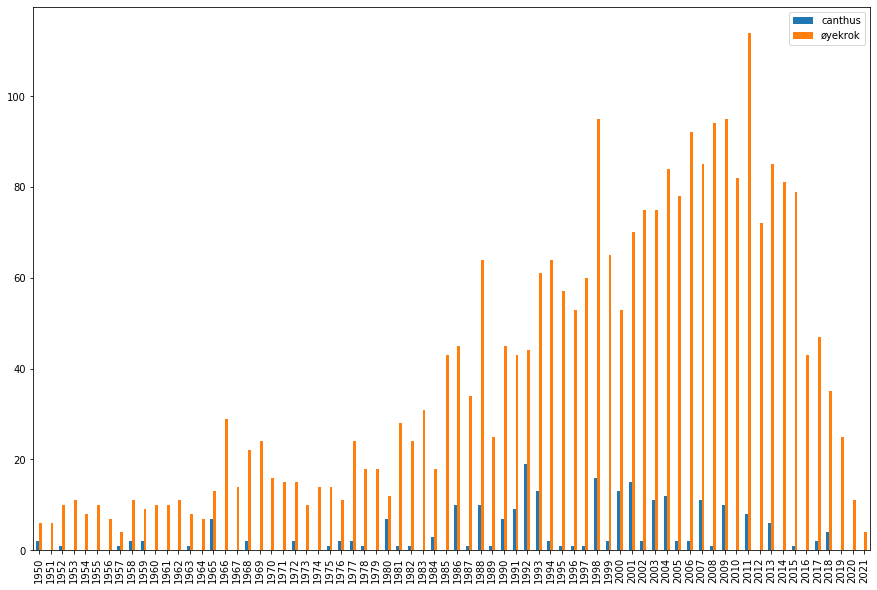

In [26]:
a.plot(smooth=1, kind='bar')

In [40]:
b = ng.NgramBook("canthus, kantus, øyekrok", ddk="61%")

In [40]:
d = ng.Ngram("canthus, kantus, øyekrok", ddk="61%")

In [67]:
c = b.ngram.sort_index()
c.index = c.index.astype(int)

In [58]:
import numpy as np

In [77]:
range(c.index.min(), c.index.max(), 10)

range(1957, 2019, 10)

In [74]:
np.arange(c.index.min(), 1.0+0.155, 0.155)

array([], dtype=float64)

In [70]:
np.arange(c.index.min(), 10, c.index.max())

array([], dtype=int64)

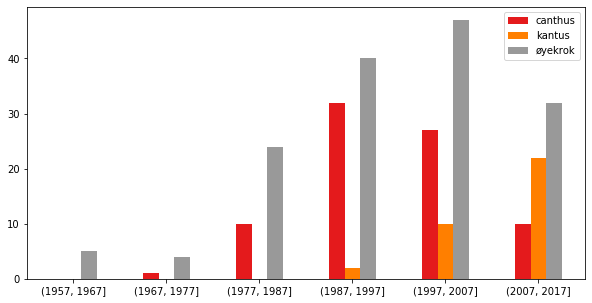

In [112]:
c.groupby(pd.cut(c.index, range(c.index.min(), c.index.max(), 10))).sum().plot(kind='bar', figsize=(10,5), rot=0, cmap="Set1")
plt.savefig('kantus_d2.jpg', dpi= 300)

In [36]:
import dhlab.api.dhlab_api as api

In [46]:
api.ngram_book(word=['canthus'], ddk = "6%")

,canthus
1957,1
1969,2
1975,1
1981,1
1982,1
1984,11
1985,12
1986,8
1988,15
1989,2
